# Testing preprocessing functions

In [1]:
import os
import numpy as np
import SimpleITK as sitk
import preprocessing_utils

In [56]:
f = r'/home/nicolab/DATA/data/ADDITIONAL/CTA_THIN/R0005/'

DicomFiles = [os.path.join(root, name)
              for root, dirs, files in os.walk(f)
              for name in files if name.endswith((".dcm", ".DCM", ".dicom", ".DICOM"))]
print(len(DicomFiles))

125


In [57]:
DicomFolder = f
reader = sitk.ImageSeriesReader()
series_found = reader.GetGDCMSeriesIDs(DicomFolder)
if len(series_found) != 1:
    print(patient + ' more series found.')
filenames = reader.GetGDCMSeriesFileNames(DicomFolder, series_found[0])
sorted_files = preprocessing_utils.sort_files(filenames, map=preprocessing_utils.GetZLocation)
reader.SetFileNames(sorted_files)
input_image = reader.Execute()


In [58]:
input_data = sitk.GetArrayFromImage(input_image)

In [63]:
ps = preprocessing_utils.GetPixelSpacing(sitk.ReadImage(sorted_files[0]))[0]
print(ps)

0.953125


In [67]:
new_data, new_spacing = preprocessing_utils.resample(input_data, sitk.ReadImage(sorted_files[0]), [0.5,0.5,0.5])

In [68]:
#sitk.WriteImage(sitk.GetImageFromArray(new_data), r'D:\Adam\Data\Registry\REGISTRY_NCCT_BL\R0001\30119332\resampled.mha')

In [69]:
print(np.shape(new_data))

(375, 976, 976)


# Checking amount of slices

In [2]:
import os
import numpy as np
import SimpleITK as sitk
import preprocessing_utils

In [ ]:
f = r'/home/nicolab/DATA/data/SUPERVISED/'
files = [os.path.join(root, name)
              for root, dirs, files in os.walk(f)
              for name in files if name.endswith(".mha")]

# Convert to .mha

In [1]:
import os
import numpy as np
import SimpleITK as sitk
import preprocessing_utils

In [3]:
rootSource = r'/home/nicolab/DATA/data/ADDITIONAL/CTA_THIN/'
rootTarget = r'/home/nicolab/DATA/data/SUPERVISED/REGISTRY/CTA_THIN/'

preprocessing_utils.DICOM2MHA_ALL(rootSource=rootSource, rootTarget=rootTarget)


R1041 done.
R0614 done.
R0048 done.
R1139 done.
R0382 done.
R0624 done.
R0868 done.
R0100 done.
R1343 done.
R0831 done.
R1200 done.
R1061 done.
R1978 done.
R0653 done.
R0748 done.
R1074 done.
R1362 done.
R0045 done.
R0118 done.
R0095 done.
R0932 done.
R1631 done.
R0348 done.
R0486 done.
R0400 done.
R0041 done.
R0297 done.
R0829 done.
R0492 done.
R1112 done.
R1302 done.
R1509 done.
R0049 done.
R0037 done.
R0473 done.
R0147 done.
R1299 done.
R0345 done.
R0794 done.
R0448 done.
R0517 done.
R0412 done.
R1501 done.
R1549 done.
R1966 done.
R0521 done.
R1131 done.
R1582 done.
R1171 done.
R0149 done.
R0858 done.
R0633 done.
R0220 done.
R0225 done.
R1330 done.
R1399 done.
R0160 done.
R0319 done.
R0202 done.
R0689 done.
R0284 done.
R0233 done.
R0141 done.
R0328 done.
R1533 done.
R0390 done.
R1046 done.
R0247 done.
R0299 done.
R0397 done.
R0942 done.
R1284 done.
R0203 done.
R1989 done.
R0987 done.
R0894 done.
R0744 done.
R0649 done.
R2012 done.
R2056 done.
R1133 done.
R0218 done.
R0702 done.
R015

R1933 done.
R0450 done.
R1551 done.
R0676 done.
R1113 done.
R1110 done.
R1256 done.
R1065 done.
R0989 done.
R1288 done.
R1580 done.
R0166 done.
R1740 done.
R0815 done.
R0616 done.
R0773 done.
R1085 done.
R0955 done.
R0530 done.
R0303 done.
R1202 done.
R0781 done.
R1070 done.
R0890 done.
R1079 done.
R0129 done.
R1265 done.
R1193 done.
R1001 done.
R0329 done.
R1019 done.
R0128 done.
R0532 done.
R0025 done.
R1435 done.
R0548 done.
R0597 done.
R0892 done.
R1951 done.
R0652 done.
R0216 done.
R1250 done.
R0674 done.
R1400 done.
R0424 done.
R1295 done.
R0807 done.
R1092 done.
R0488 done.
R1150 done.
R0816 done.
R0927 done.
R0648 done.
R1132 done.
R1934 done.
R0698 done.
R0116 done.
R0809 done.
R0594 done.
R0255 done.
R1194 done.
R0391 done.
R0570 done.
R0241 done.
R1211 done.
R1137 done.
R1164 done.
R1493 done.
R0691 done.
R1252 done.
R1363 done.
R0923 done.
R0408 done.
R1319 done.
R0380 done.
R0256 done.
R1943 done.
R1064 done.
R0820 done.
R0604 done.
R0466 done.
R1080 done.
R1103 done.
R179

# Count slices

In [46]:
patients = os.listdir(rootSource)

spaces = []
for patient in patients:
    f = rootSource + patient
    files = [os.path.join(root, name)
                  for root, dirs, files in os.walk(f)
                  for name in files if name.endswith((".dcm",".DICOM",".DCM",".dicom"))]
    spaces.append(preprocessing_utils.GetPixelSpacing(sitk.ReadImage(files[0]))[0])

In [22]:
print([ patients[i] for i in range(len(slices)) if slices[i] < 100])

['R1294', 'R0108', 'R0244', 'R0816', 'R0207', 'R0241', 'R1103', 'R0643']


In [55]:
print([ patients[i] for i in range(len(spaces)) if spaces[i] > 0.7])

['R0708', 'R1007', 'R0640', 'R2056', 'R0577', 'R1582', 'R0059', 'R0796', 'R0746', 'R0822', 'R1982', 'R2016', 'R1106', 'R1210', 'R1249', 'R0200', 'R1535', 'R1070', 'R0923', 'R1536', 'R0769', 'R1048', 'R2001', 'R0927', 'R0698', 'R1493', 'R0005', 'R1633', 'R1270', 'R0739', 'R0718', 'R1187', 'R1049', 'R0688', 'R2060']


In [54]:
print(np.mean(spaces))

0.486499876


# Testing registration for ASPECTS

In [1]:
def align(scan, scanBrain, atlas, atlasBrain, rootTarget="", cta=False, epochs=1):

    # Load atlas and atlas brain mask.
    atlas = sitk.Cast(sitk.ReadImage(atlas), sitk.sitkFloat32)
    atlas_brain_mask = sitk.ReadImage(atlasBrain)

    # Resample atlas to image dimensions
    resample = sitk.ResampleImageFilter()
    resample.SetTransform(sitk.Transform(3, sitk.sitkIdentity))
    resample.SetReferenceImage(atlas)
    out_size = scan.GetSize()
    in_size = atlas.GetSize()
    resample.SetSize(out_size)
    in_spacing = atlas.GetSpacing()
    outputspacing = [in_spacing[0] * (in_size[0] / out_size[0]), in_spacing[1] * (in_size[1] / out_size[1]),
                     in_spacing[2] * (in_size[2] / out_size[2])]
    resample.SetOutputSpacing(outputspacing)
    resample.SetInterpolator(sitk.sitkNearestNeighbor)
    atlas = resample.Execute(atlas)
#    sitk.WriteImage(atlas, os.path.join(scanFolder, "ResampledAtlas.mha"))

    # Resample atlas_mask to image dimensions
    resample = sitk.ResampleImageFilter()
    resample.SetTransform(sitk.Transform(3, sitk.sitkIdentity))
    resample.SetReferenceImage(atlas_brain_mask)
    resample.SetSize(out_size)
    resample.SetOutputSpacing(outputspacing)
    resample.SetInterpolator(sitk.sitkNearestNeighbor)
    atlas_brain_mask = resample.Execute(atlas_brain_mask)

#    sitk.WriteImage(scanBrain, os.path.join(r"C:\Users\Adam\Registry\NCCT_BL\ST_THINNEST\R0394\ResampledAtlasBrainMask.mha"))

    # Initial transform to align images based on center of mass.
    initial_transform = sitk.CenteredTransformInitializer(atlas_brain_mask,  # fixed image
                                                          scanBrain,  # moving image
                                                          sitk.Euler3DTransform(),
                                                          sitk.CenteredTransformInitializerFilter.MOMENTS)

    # Applying initial transform + correcting for non-square images
    dim = scanBrain.GetSize()[0] if scanBrain.GetSize()[0] < scanBrain.GetSize()[1] else scanBrain.GetSize()[1]
    moving_image_mask = sitk.Resample(scanBrain,  # moving image
                                      atlas_brain_mask,  # fixed image
                                      initial_transform,
                                      sitk.sitkNearestNeighbor,
                                      0.0,
                                      sitk.sitkUInt8)[
                                        int(scanBrain.GetSize()[0]/2)-int(dim/2):int(scanBrain.GetSize()[0]/2)+int(dim/2),
                                        int(scanBrain.GetSize()[1]/2)-int(dim/2):int(scanBrain.GetSize()[1]/2)+int(dim/2), :]

    atlas_brain_mask = atlas_brain_mask[
                                        int(scanBrain.GetSize()[0]/2)-int(dim/2):int(scanBrain.GetSize()[0]/2)+int(dim/2),
                                        int(scanBrain.GetSize()[1]/2)-int(dim/2):int(scanBrain.GetSize()[1]/2)+int(dim/2), :]
    scan = scan[
                                        int(scanBrain.GetSize()[0]/2)-int(dim/2):int(scanBrain.GetSize()[0]/2)+int(dim/2),
                                        int(scanBrain.GetSize()[1]/2)-int(dim/2):int(scanBrain.GetSize()[1]/2)+int(dim/2), :]
    atlas = atlas[
                                        int(scanBrain.GetSize()[0]/2)-int(dim/2):int(scanBrain.GetSize()[0]/2)+int(dim/2),
                                        int(scanBrain.GetSize()[1]/2)-int(dim/2):int(scanBrain.GetSize()[1]/2)+int(dim/2), :]

    composed_transformation = sitk.Transform(3, sitk.sitkComposite)
    composed_transformation.AddTransform(initial_transform)
#    sitk.WriteImage(moving_image_mask, os.path.join(rootTarget, "BeforeMetricBrainMask.mha"))

    shape_info = sitk.LabelShapeStatisticsImageFilter()
    shape_info.Execute(moving_image_mask)
    centroid = shape_info.GetCentroid(1)
    centroid_index = sitk.Image.TransformPhysicalPointToContinuousIndex(moving_image_mask, centroid)

    # Check for major mis-orientation
#	orient = MetricEvaluate(sitk.Cast(atlas_brain_mask, sitk.sitkFloat32), sitk.Cast(moving_image_mask, sitk.sitkFloat32))

#	if not (orient[0] == 0.0 and orient[1] == 0.0 and orient[2] == 0.0):
#		rotation = sitk.Euler3DTransform(centroid, orient[0], orient[1], orient[2])
#		moving_image_mask = sitk.Resample(moving_image_mask, moving_image_mask, rotation, sitk.sitkNearestNeighbor, 0.0)
#		composed_transformation.AddTransform(rotation)

#	sitk.WriteImage(moving_image_mask, os.path.join(rootTarget, patient, "BeforeInitialAlignmentBrainMask.mha"))

    for i in range(epochs):
        # Align Z plane using symmetry detection.
        image_width = moving_image_mask.GetSize()[0]
        angle = -(numpy.pi/4.0)-(i*((numpy.pi/4.0)/epochs))
        best_angle = 0.0
        step = 0.05-(i*(0.05/epochs))
        half_image_width = int(image_width / 2)
        min_diff = moving_image_mask.GetSize()[0] * moving_image_mask.GetSize()[1] * moving_image_mask.GetSize()[2] / 2
        while angle <= (numpy.pi/4.0)-(i*((numpy.pi/4.0)/epochs)):
            rotation = sitk.Euler3DTransform(centroid, 0.0, 0.0, angle)
            rotated_mask = sitk.Resample(moving_image_mask, moving_image_mask, rotation, sitk.sitkNearestNeighbor, 0.0)
            rotated_mask_data = sitk.GetArrayFromImage(rotated_mask)
            # Check sides
            left_side = rotated_mask_data[:, :, 0:half_image_width]
            right_side = rotated_mask_data[:, :, half_image_width:2 * half_image_width]
            right_side = numpy.flip(right_side, 2)
            diff_sides = numpy.square(right_side - left_side)
            count_diff = numpy.sum(diff_sides)
            # Check gaps
            non_zero_coords = numpy.nonzero(rotated_mask_data)
            max_y = numpy.max(non_zero_coords[1])
            min_y = numpy.min(non_zero_coords[1])
            y_gap = min_y + (moving_image_mask.GetSize()[1] - max_y)
            max_x = numpy.max(non_zero_coords[2])
            min_x = numpy.min(non_zero_coords[2])
            x_gap = min_x + (moving_image_mask.GetSize()[0] - max_x)

            if count_diff < min_diff and y_gap < x_gap:
                best_angle = angle
                min_diff = count_diff
            angle += step

        rotation = sitk.Euler3DTransform(centroid, 0.0, 0.0, best_angle)
        moving_image_mask = sitk.Resample(moving_image_mask, moving_image_mask, rotation, sitk.sitkNearestNeighbor, 0.0)
        composed_transformation.AddTransform(rotation)
#        print(best_angle)
#        sitk.WriteImage(moving_image_mask, os.path.join(rootTarget, "InitialAlignmentZBrainMask.mha"))

        # Align Y plane using symmetry detection.
        angle = -((numpy.pi/4.0) - (i * ((numpy.pi/4.0) / epochs)))
        best_angle = -((numpy.pi/4.0) - (i * ((numpy.pi/4.0) / epochs)))
        step = 0.05 - (i * (0.05 / epochs))
        half_image_width = int(moving_image_mask.GetSize()[1] / 2)
        min_diff = moving_image_mask.GetSize()[0] * moving_image_mask.GetSize()[1] * moving_image_mask.GetSize()[2] / 2

        while angle <= (numpy.pi/4.0) - (i * ((numpy.pi/4.0) / epochs)):
            rotation = sitk.Euler3DTransform(centroid, 0.0, angle, 0.0)
            rotated_mask = sitk.Resample(moving_image_mask, moving_image_mask, rotation, sitk.sitkNearestNeighbor, 0.0)
            rotated_mask_data = sitk.GetArrayFromImage(rotated_mask)
            left_side = rotated_mask_data[:, :, 0:half_image_width]
            right_side = rotated_mask_data[:, :, half_image_width:2 * half_image_width]
            right_side = numpy.flip(right_side, 2)
            diff_sides = numpy.square(right_side - left_side)
            count_diff = numpy.sum(diff_sides)
            if count_diff < min_diff:
                best_angle = angle
                min_diff = count_diff
            angle += step
        rotation = sitk.Euler3DTransform(centroid, 0.0, best_angle, 0.0)
        moving_image_mask = sitk.Resample(moving_image_mask, moving_image_mask, rotation, sitk.sitkNearestNeighbor, 0.0)
        composed_transformation.AddTransform(rotation)
#		print(best_angle)
#        sitk.WriteImage(moving_image_mask, os.path.join(rootTarget, "InitialAlignmentYBrainMask.mha"))

        # Align X plane using sagittal heuristics.
        non_zero_coords = numpy.nonzero(sitk.GetArrayFromImage(moving_image_mask))
        min_y = numpy.argmin(non_zero_coords[1])
        max_y = numpy.argmax(non_zero_coords[1])
        direction = 1.0 if non_zero_coords[0][min_y] < moving_image_mask.GetSize()[2] / 2 else -1.0
        angle = 0.0
        best_angle = 0.0
        step = 0.05 - (i * (0.05 / epochs))
        max_gap = abs(non_zero_coords[1][max_y] - non_zero_coords[1][min_y])
        while abs(angle) <= (numpy.pi/4.0) - (i * ((numpy.pi/4.0) / epochs)):
            rotation = sitk.Euler3DTransform(centroid, angle, 0.0, 0.0)
            rotated_mask = sitk.Resample(moving_image_mask, moving_image_mask, rotation, sitk.sitkNearestNeighbor, 0.0)
            coords = numpy.nonzero(sitk.GetArrayFromImage(rotated_mask))
            gap = abs(max(coords[1]) - min(coords[1]))
            if gap > max_gap:
                best_angle = angle
                max_gap = gap
            angle += (direction * step)
        rotation = sitk.Euler3DTransform(centroid, best_angle, 0.0, 0.0)
        moving_image_mask = sitk.Resample(moving_image_mask, moving_image_mask, rotation, sitk.sitkNearestNeighbor, 0.0)
        composed_transformation.AddTransform(rotation)
#        print(max_gap)
#        sitk.WriteImage(moving_image_mask, os.path.join(rootTarget, "InitialAlignmentXBrainMask.mha"))

    # Resample images after initial alignment.
    moving_image_mask = sitk.Resample(scanBrain,
                                      atlas_brain_mask,
                                      composed_transformation,
                                      sitk.sitkNearestNeighbor,
                                      0.0,
                                      sitk.sitkUInt8)

    moving_image = sitk.Resample(scan,
                                 atlas,
                                 composed_transformation,
                                 sitk.sitkLinear,
                                 0.0,
                                 sitk.sitkFloat32)

#    sitk.WriteImage(moving_image_mask, os.path.join(rootTarget, "AlignedBrainMask.mha"))
#    sitk.WriteImage(moving_image, os.path.join(rootTarget, "AlignedScan.mha"))

    return moving_image, moving_image_mask, atlas, atlas_brain_mask

In [2]:

def register(patient, rootSource, rootTarget, atlasScan, atlasMask, aspects, cta = False, scanBrain=""):
    thicknesses = [float(thickness) for thickness in os.listdir(os.path.join(rootSource, patient))]

    for thickness in thicknesses:
#	if os.path.isfile(scanPath):
        scanFolder = os.path.join(rootSource, patient, str(thickness))
#		scan = sitk.ReadImage(scanPath)
#	else:
#		scanFolder = scanPath

        # --- Define output files ---
        if rootTarget == "":
            initialAlignmentMask = os.path.join(scanFolder, "AlignedBrainMask.mha")
            initialAlignment = os.path.join(scanFolder, "AlignedScan.mha")
            bsplineAspects = os.path.join(scanFolder, "BsplineRegisteredASPECTS.mha")
        else:
            if not os.path.exists(os.path.join(rootTarget, patient, str(thickness))):
                os.makedirs(os.path.join(rootTarget, patient, str(thickness)))
            initialAlignmentMask = os.path.join(rootTarget, patient, str(thickness), "AlignedBrainMask.mha")
            initialAlignment = os.path.join(rootTarget, patient, str(thickness), "AlignedScan.mha")
            bsplineAspects = os.path.join(rootTarget, patient, str(thickness), "BsplineRegisteredASPECTS.mha")
            
        # --- Load scan ---
        reader = sitk.ImageSeriesReader()
        series_found = reader.GetGDCMSeriesIDs(scanFolder)
        if len(series_found) != 1:
            print('More series found in a single folder.')
            return
        filenames = reader.GetGDCMSeriesFileNames(scanFolder, series_found[0])
        reader.SetFileNames(filenames)
        scan = reader.Execute()
        
        scan = sitk.Cast(scan, sitk.sitkFloat32)        
        sitk.WriteImage(scan, os.path.join(rootTarget, patient, str(thickness), "OriginalScan.mha"))

        # --- Skullstrip ---
        scanBrain = os.path.join(rootTarget, patient, str(thickness), "OriginalBrainMask.mha")
        if not os.path.exists(scanBrain):
            # Skull stripping part.
            if cta:
                scan_brain_mask = bs.segment_brain(scan, -20, 330, 350)
            else:
                scan_brain_mask = bs.segment_brain(scan, -20, 140, 160)
            sitk.WriteImage(scan_brain_mask, scanBrain)
        else:
            scan_brain_mask = sitk.ReadImage(scanBrain)
            
        # --- Align scan ---
        scan, scan_brain_mask, atlas, atlas_brain_mask = align(
            scan=scan,
            scanBrain=scan_brain_mask,
            atlas=atlasScan,
            atlasBrain=atlasMask,
            rootTarget=os.path.join(rootTarget, patient, str(thickness)),
            cta=False)

        sitk.WriteImage(scan_brain_mask, initialAlignmentMask)
        sitk.WriteImage(scan, initialAlignment)

        # Load ASPECTS atlas
        aspects_image = sitk.ReadImage(aspects)

        # Resample aspects to image dimensions
        out_size = scan.GetSize()
        in_size = aspects_image.GetSize()
        in_spacing = aspects_image.GetSpacing()
        outputspacing = [in_spacing[0] * (in_size[0] / out_size[0]), in_spacing[1] * (in_size[1] / out_size[1]),
                         in_spacing[2] * (in_size[2] / out_size[2])]

        resample = sitk.ResampleImageFilter()
        resample.SetTransform(sitk.Transform(3, sitk.sitkIdentity))
        resample.SetReferenceImage(aspects_image)
        resample.SetSize(out_size)
        resample.SetOutputSpacing(outputspacing)
        resample.SetInterpolator(sitk.sitkNearestNeighbor)
        aspects_image = resample.Execute(aspects_image)

        #sitk.WriteImage(aspects_image, os.path.join(scanFolder, "ResampledASPECTSMask.mha"))

        # Perform affine registration.
        parameter_map = sitk.GetDefaultParameterMap("affine")
        parameter_map["ResampleInterpolator"] = ["FinalNearestNeighborInterpolator"]
        parameter_map["Interpolator"] = ["NearestNeighborInterpolator"]
        parameter_map["FinalBSplineInterpolationOrder"] = ["1"]
        parameter_map["FixedImagePyramidSchedule"] = ["2", "2", "2", "1", "1", "1"]
        parameter_map["ImageSampler"] = ["Grid"]
        parameter_map["SampleGridSpacing"] = ["8"]
        parameter_map["MaximumStepLength"] = ["8.0", "2.0"]
        parameter_map["MaximumNumberOfIterations"] = ["300"]
        parameter_map["MovingImagePyramidSchedule"] = ["2", "2", "2", "1", "1", "1"]
        parameter_map["NumberOfResolutions"] = ["2"]
        parameter_map["Metric"] = ["AdvancedMeanSquares"]

        elastix_filter = sitk.ElastixImageFilter()
        elastix_filter.SetLogToConsole(False)  # True to visualize progress.
        elastix_filter.SetLogToFile(False)
        elastix_filter.SetFixedImage(scan_brain_mask)
        elastix_filter.SetMovingImage(atlas_brain_mask)
        elastix_filter.SetParameterMap(parameter_map)
        elastix_filter.Execute()
        affine_result_mask = elastix_filter.GetResultImage()
        #sitk.WriteImage(affine_result_mask, os.path.join(scanFolder, "AffineRegisteredAtlasMask.mha"))

        transformix_filter = sitk.TransformixImageFilter()
        transformix_filter.SetMovingImage(atlas)
        transformix_filter.SetLogToConsole(False)  # True to visualize progress.
        transformix_filter.SetLogToFile(False)
        parameter_map = elastix_filter.GetTransformParameterMap()[0]
        parameter_map["ResampleInterpolator"] = ["FinalBSplineInterpolator"]
        parameter_map["FinalBSplineInterpolationOrder"] = ["3"]
        parameter_map["FixedInternalImagePixelType"] = ["float"]
        parameter_map["MovingInternalImagePixelType"] = ["float"]
        parameter_map["ResultImagePixelType"] = ["float"]
        transformix_filter.SetTransformParameterMap(parameter_map)
        transformix_filter.Execute()
        affine_result_atlas = transformix_filter.GetResultImage()
        #sitk.WriteImage(affine_result_atlas, os.path.join(scanFolder, "AffineRegisteredAtlas.mha"))

        transformix_filter = sitk.TransformixImageFilter()
        transformix_filter.SetMovingImage(aspects_image)
        transformix_filter.SetLogToConsole(False)  # True to visualize progress.
        transformix_filter.SetLogToFile(False)
        parameter_map = elastix_filter.GetTransformParameterMap()[0]
        parameter_map["ResampleInterpolator"] = ["FinalNearestNeighborInterpolator"]
        parameter_map["FinalBSplineInterpolationOrder"] = ["1"]
        parameter_map["ResultImagePixelType"] = ["short"]
        transformix_filter.SetTransformParameterMap(parameter_map)
        transformix_filter.Execute()
        affine_result_aspects = transformix_filter.GetResultImage()
        #sitk.WriteImage(affine_result_aspects, os.path.join(scanFolder, "AffineRegisteredASPECTS.mha"))

        # Perform non-rigid registration.
        parameter_map = sitk.GetDefaultParameterMap("bspline")
        parameter_map["MaximumNumberOfIterations"] = ["1000"]
        parameter_map["FinalGridSpacingInPhysicalUnits"] = ["8"]
        parameter_map["GridSpacingSchedule"] = ["3.0", "2.0", "1.5", "1"]
        parameter_map["MaximumStepLength"] = ["12.0", "10.0", "8.0", "6.0"]

        elastix_filter = sitk.ElastixImageFilter()
        elastix_filter.SetLogToConsole(False)  # True to visualize progress.
        elastix_filter.SetLogToFile(False)
        elastix_filter.SetFixedImage(scan)
        elastix_filter.SetMovingImage(affine_result_atlas)
        elastix_filter.SetParameterMap(parameter_map)
        elastix_filter.Execute()
        bspline_result_atlas = elastix_filter.GetResultImage()
        #sitk.WriteImage(bspline_result_atlas, os.path.join(scanFolder, "BSplineRegisteredAtlas.mha"))

        # Transform brainmask
        #transformix_filter = sitk.SimpleTransformix()
        #transformix_filter.SetMovingImage(affine_result_mask)
        #transformix_filter.SetLogToConsole(False)  # True to visualize progress.
        #transformix_filter.SetLogToFile(False)
        #parameter_map = elastix_filter.GetTransformParameterMap()[0]
        #parameter_map["ResampleInterpolator"] = ["FinalNearestNeighborInterpolator"]
        #parameter_map["FinalBSplineInterpolationOrder"] = ["1"]
        #parameter_map["ResultImagePixelType"] = ["unsigned char"]
        #transformix_filter.SetTransformParameterMap(parameter_map)
        #transformix_filter.Execute()
        #bspline_result_mask = transformix_filter.GetResultImage()
        #sitk.WriteImage(bspline_result_mask, os.path.join(scanFolder, "BsplineRegisteredAtlasMask.mha"))

        # Transform aspects
        transformix_filter = sitk.TransformixImageFilter()
        transformix_filter.SetMovingImage(affine_result_aspects)
        transformix_filter.SetLogToConsole(False)  # True to visualize progress.
        transformix_filter.SetLogToFile(False)
        parameter_map = elastix_filter.GetTransformParameterMap()[0]
        parameter_map["ResampleInterpolator"] = ["FinalNearestNeighborInterpolator"]
        parameter_map["FinalBSplineInterpolationOrder"] = ["1"]
        parameter_map["ResultImagePixelType"] = ["short"]
        transformix_filter.SetTransformParameterMap(parameter_map)
        transformix_filter.Execute()
        bspline_result_aspects = transformix_filter.GetResultImage()
        sitk.WriteImage(bspline_result_aspects, bsplineAspects)



In [3]:
import os
import time
import SimpleITK as sitk
import brain_segmentation as bs
import numpy

ASSETS = r'/home/hilbysfe/DATA/ASSETS'
ATLAS = os.path.join(ASSETS, "Brainatlas.mha")
BRAINATLAS = os.path.join(ASSETS, "Brainmask.mha")
ASPECTS = os.path.join(ASSETS, "ASPECTS.mha")

DATADIR = r'/home/hilbysfe/DATA/SUPERVISED/REGISTRY/NCCT/ST_BL_ALL/'
OUTDIR = r'/home/hilbysfe/DATA/SUPERVISED/REGISTRY/NCCT/ASPECTS_ALL/'

start = time.time()
register(
                patient='R0107',
                rootSource=DATADIR,
                rootTarget=OUTDIR,
                atlasScan=ATLAS,
                atlasMask=BRAINATLAS,
                aspects=ASPECTS,
                cta=False)
end = time.time()
print(end - start)

310.7895727157593


In [7]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/hilbysfe/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(0.453125, 0.453125, 3.3319199085235596)
7


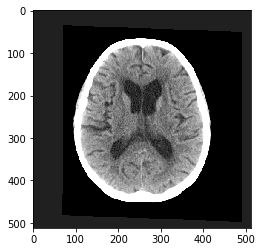

In [179]:
path = "/home/hilbysfe/DATA/SUPERVISED/REGISTRY/NCCT/ASPECTS_ALL/R0394/3.0"
#img = sitk.ReadImage(os.path.join(path,"Original.mha"))
img = sitk.ReadImage(os.path.join(path,"AlignedScan.mha"))
#img = sitk.ReadImage(os.path.join(path,"BsplineRegisteredASPECTS.mha"))
#img = sitk.ReadImage(os.path.join(path,"BeforeMetricBrainMask.mha"))
#img = sitk.ReadImage(os.path.join(path,"InitialAlignmentZBrainMask.mha"))
#img = sitk.ReadImage(os.path.join(path,"InitialAlignmentYBrainMask.mha"))
#img = sitk.ReadImage(os.path.join(path,"InitialAlignmentXBrainMask.mha"))

center= 30
width = 80

window_filter = sitk.IntensityWindowingImageFilter()
window_filter.SetWindowMinimum(center - (width / 2))
window_filter.SetWindowMaximum(center + (width / 2))
window_filter.SetOutputMinimum(0)
window_filter.SetOutputMaximum(255)
img_plot = sitk.GetArrayFromImage(window_filter.Execute(img))[::-1,:,:]
#img_plot = sitk.GetArrayFromImage(img)[::-1,:,:]
spacing = img.GetSpacing()

shape = numpy.shape(img_plot)
new_shape = (int(shape[0]*(spacing[2]/spacing[0])), shape[1], shape[2])
print(spacing)
new_data = numpy.zeros(new_shape)

window = int(new_shape[0] / shape[0])
print(window)
for i in range(shape[0]):
    for j in range(window):
        new_data[(i*window)+j,:,:] = img_plot[i,:,:]

plt.imshow(new_data[int(new_shape[0]/2)-10,:,:], cmap='gray', interpolation='none')

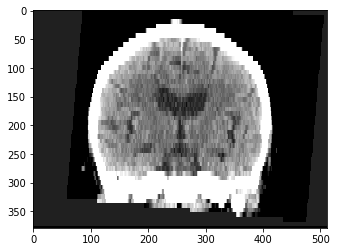

In [165]:
plt.imshow(new_data[:,int(new_shape[1]/2),:], cmap='gray', interpolation='none')

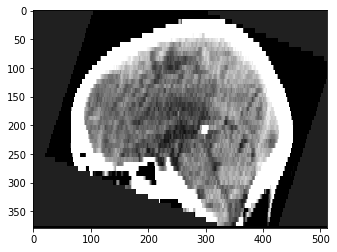

In [166]:
plt.imshow(new_data[:,:,int(new_shape[2]/2)], cmap='gray', interpolation='none')

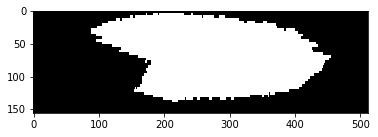

In [95]:
plt.imshow(new_data[:,:,int(new_shape[2]/2)], cmap='gray', interpolation='none')